In [3]:
import pandas as pd
import numpy as np

<h3>Load Dataset</h3>

In [4]:
df = pd.read_csv("../Collection of DS take home challenges/data collection-Product dataset数据挑战数据集/INSIGHTS Conversion Rate with solution/conversion_project.csv")
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              316200 non-null  object
 1   age                  316200 non-null  int64 
 2   new_user             316200 non-null  int64 
 3   source               316200 non-null  object
 4   total_pages_visited  316200 non-null  int64 
 5   converted            316200 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [6]:
df.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [7]:
for column in df.columns:
    uniques = sorted(df[column].unique())
    print("{0:20s} {1:5d}\t {2}".format(column, len(uniques), uniques[:5]))

country                  4	 ['China', 'Germany', 'UK', 'US']
age                     60	 [17, 18, 19, 20, 21]
new_user                 2	 [0, 1]
source                   3	 ['Ads', 'Direct', 'Seo']
total_pages_visited     29	 [1, 2, 3, 4, 5]
converted                2	 [0, 1]


<h3>Data Cleaning</h3>

The max age is 123 which is an outlier. 

Two outliers were detected.

In [8]:
df.sort_values(["age"], ascending = False)[:10]

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
295581,UK,111,0,Ads,10,1
265167,US,79,1,Direct,1,0
192644,US,77,0,Direct,4,0
154217,US,73,1,Seo,5,0
208969,US,72,1,Direct,4,0
301366,UK,70,0,Ads,5,0
114485,US,70,1,Ads,9,0
57122,UK,69,1,Direct,4,0
290142,US,69,1,Seo,6,0


create a dataframe with no outlier

In [9]:
data = df[df["age"] < 100]

<h3>Exploratory Data Analysis</h3>

In [10]:
data["country"].value_counts() #country

US         178092
China       76602
UK          48449
Germany     13055
Name: country, dtype: int64

In [11]:
def ageinterval(x):
    if x >= 10 and x <= 20:
        return "10-20"
    elif x > 20 and x <= 30:
        return "20-30"
    elif x > 30 and x <= 40:
        return "30-40"
    elif x > 40 and x <= 50:
        return "40-50"
    elif x > 50 and x <= 60:
        return "50-60"
    elif x > 60 and x <= 70:
        return "60-70"
    elif x > 70 and x <= 80:
        return "70-80"
    elif x > 80 and x <= 90:
        return "80-90"
    elif x > 90 and x <= 100:
        return "90-100"

In [12]:
data["age_interval"] = data["age"].apply(ageinterval)

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
data

,country,age,new_user,source,total_pages_visited,converted,age_interval
0,UK,25,1,Ads,1,0,20-30
1,US,23,1,Seo,5,0,20-30
2,US,28,1,Seo,4,0,20-30
3,China,39,1,Seo,5,0,30-40
4,US,30,1,Seo,6,0,20-30
...,...,...,...,...,...,...,...
316195,US,26,1,Ads,9,0,20-30
316196,US,27,1,Direct,6,0,20-30
316197,China,25,0,Ads,4,0,20-30
316198,US,22,0,Seo,4,0,20-30


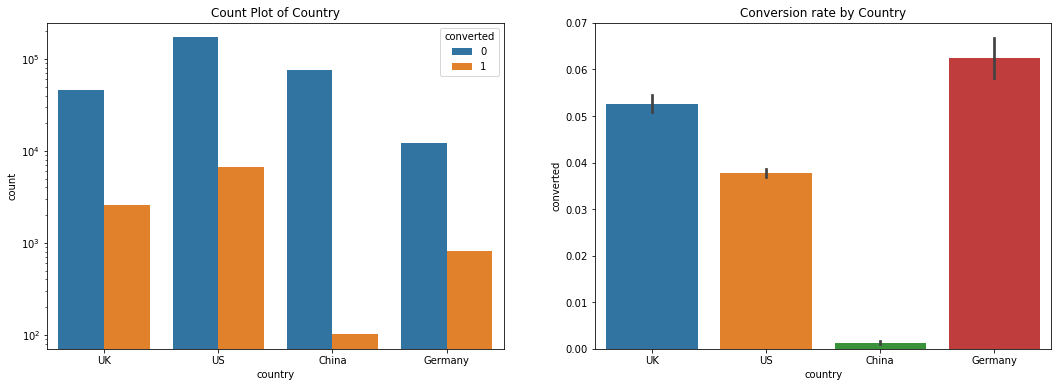

In [15]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 6))

sns.countplot(x = "country", hue = "converted", data = data, ax = ax[0])
ax[0].set_title("Count Plot of Country")
ax[0].set_yscale("log")

sns.barplot(x = 'country', y = 'converted', data = data, ax = ax[1])
ax[1].set_title("Conversion rate by Country")

plt.show()

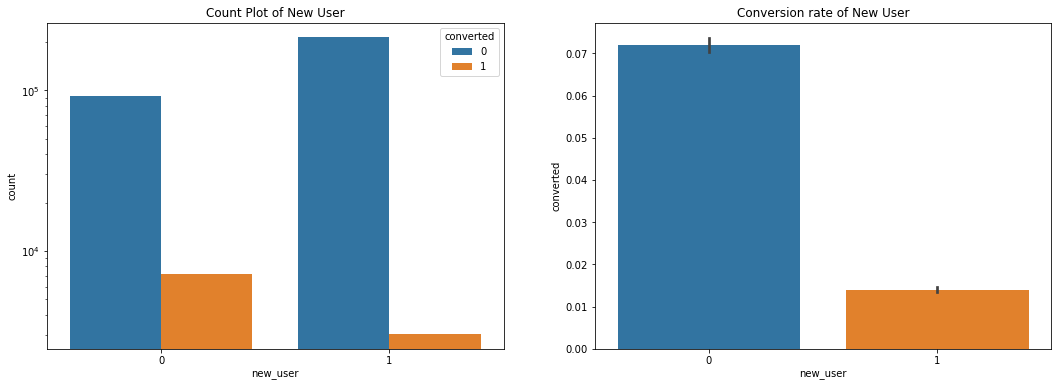

In [16]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 6))

sns.countplot(x = "new_user", hue = "converted", data = data, ax = ax[0])
ax[0].set_title("Count Plot of New User")
ax[0].set_yscale("log")

sns.barplot(x = "new_user", y = "converted", data = data, ax = ax[1])
ax[1].set_title("Conversion rate of New User")

plt.show()

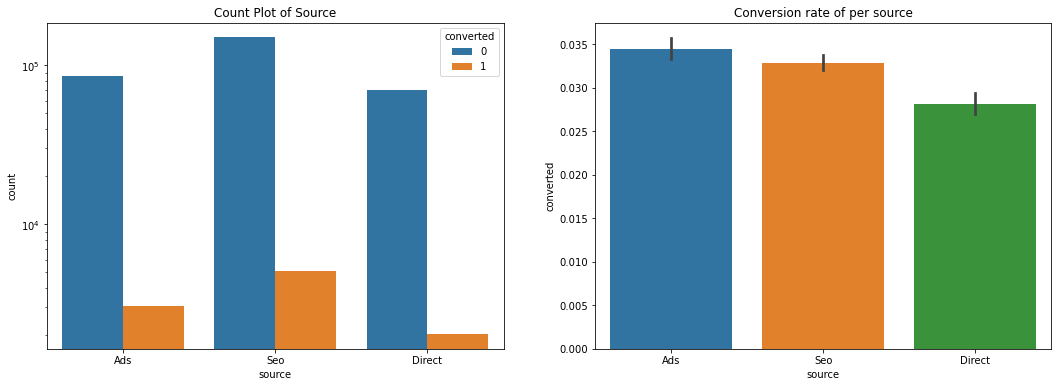

In [17]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 6))

sns.countplot(x = "source", hue = "converted", data = data, ax = ax[0])
ax[0].set_title("Count Plot of Source")
ax[0].set_yscale("log")

sns.barplot(x = "source", y = "converted", data = data, ax = ax[1])
ax[1].set_title("Conversion rate of per source")

plt.show()

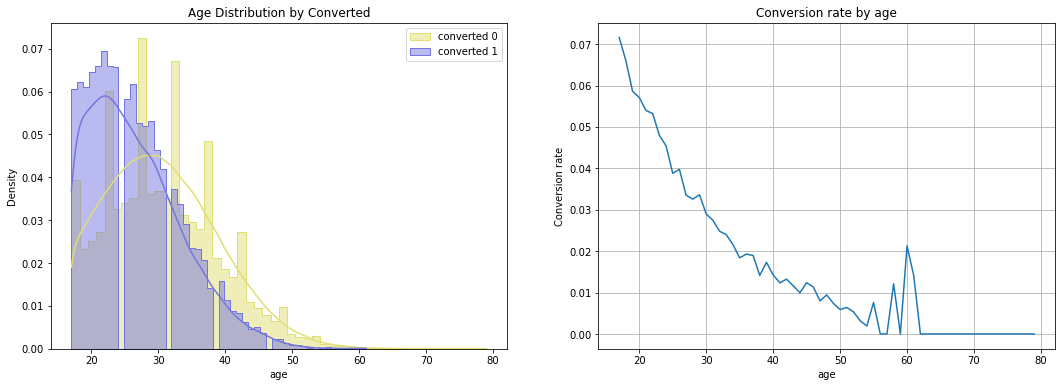

In [18]:
fig, ax = plt.subplots(1, 2 ,figsize = (18, 6))

sns.histplot(data[data["converted"] == 0]["age"], stat = "density", ax = ax[0], label = "converted 0", kde = True, color = "#E0DE74", bins = 50, element = "step")
sns.histplot(data[data["converted"] == 1]["age"], stat = "density", ax = ax[0], label = "converted 1", kde = True, color = "#7476E0", bins = 50, element = "step")
ax[0].legend()
ax[0].set_title("Age Distribution by Converted")

agemean = data.groupby("age").mean().reset_index()
sns.lineplot(x = agemean["age"], y = agemean["converted"], ax = ax[1])
ax[1].set_title("Conversion rate by age")
ax[1].set_ylabel("Conversion rate")
ax[1].grid(True)

plt.show()

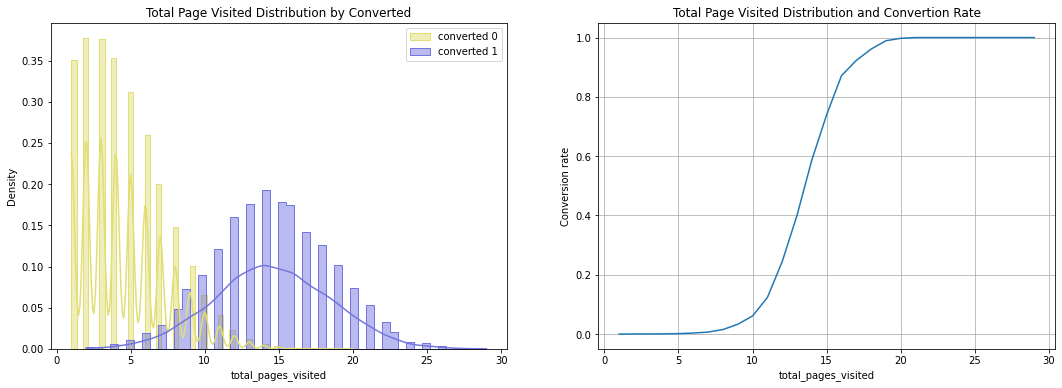

In [19]:
fig, ax = plt.subplots(1, 2 ,figsize = (18, 6))

sns.histplot(data[data["converted"] == 0]["total_pages_visited"], stat = "density", ax = ax[0], label = "converted 0", kde = True, color = "#E0DE74", bins = 50, element = "step")
sns.histplot(data[data["converted"] == 1]["total_pages_visited"], stat = "density", ax = ax[0], label = "converted 1", kde = True, color = "#7476E0", bins = 50, element = "step")
ax[0].legend()
ax[0].set_title("Total Page Visited Distribution by Converted")

pagemean = data.groupby("total_pages_visited").mean().reset_index()
sns.lineplot(x = pagemean["total_pages_visited"], y = pagemean["converted"], ax = ax[1])
ax[1].set_title("Total Page Visited Distribution and Convertion Rate")
ax[1].set_ylabel("Conversion rate")
ax[1].grid(True)

<h3>Model Building</h3>

In [30]:
from sklearn.metrics import auc, roc_curve, classification_report
from sklearn.model_selection import train_test_split
import h2o
from h2o.frame import H2OFrame
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.grid.grid_search import H2OGridSearch

In [21]:
h2o.init()
h2o.remove_all()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,16 mins 12 secs
H2O_cluster_timezone:,America/Indiana/Indianapolis
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.4
H2O_cluster_version_age:,4 months and 14 days !!!
H2O_cluster_name:,H2O_from_python_haorzeng_69nf96
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.546 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [28]:
h2o_df = H2OFrame(data)

h2o_df["new_user"] = h2o_df["new_user"].asfactor()
h2o_df["converted"] = h2o_df["converted"].asfactor()

h2o_df = h2o_df.drop("age_interval")
h2o_df.summary()

Parse progress: |█████████████████████████████████████████████████████████| 100%


,country,age,new_user,source,total_pages_visited,converted
type,enum,int,enum,enum,int,enum
mins,,17.0,,,1.0,
mean,,30.569311001334697,,,4.872918234776944,
maxs,,79.0,,,29.0,
sigma,,8.268957596421497,,,3.3410533442156294,
zeros,,0,,,0,
missing,0,0,0,0,0,0
0,UK,25.0,1,Ads,1.0,0
1,US,23.0,1,Seo,5.0,0
2,US,28.0,1,Seo,4.0,0


In [44]:
split = h2o_df["converted"].stratified_split(test_frac = 0.25, seed = 42)

train = h2o_df[split == "train"]
test = h2o_df[split == "test"]

feature = ["country", "age", "new_user", "source", "total_pages_visited"]
target = "converted"

In [45]:
model = H2ORandomForestEstimator(balance_classes = True, ntrees = 100, max_depth = 20, seed = 42, score_each_iteration = True)
model.train(x = feature, y = target, training_frame = train)

drf Model Build progress: |███████████████████████████████████████████████| 100%


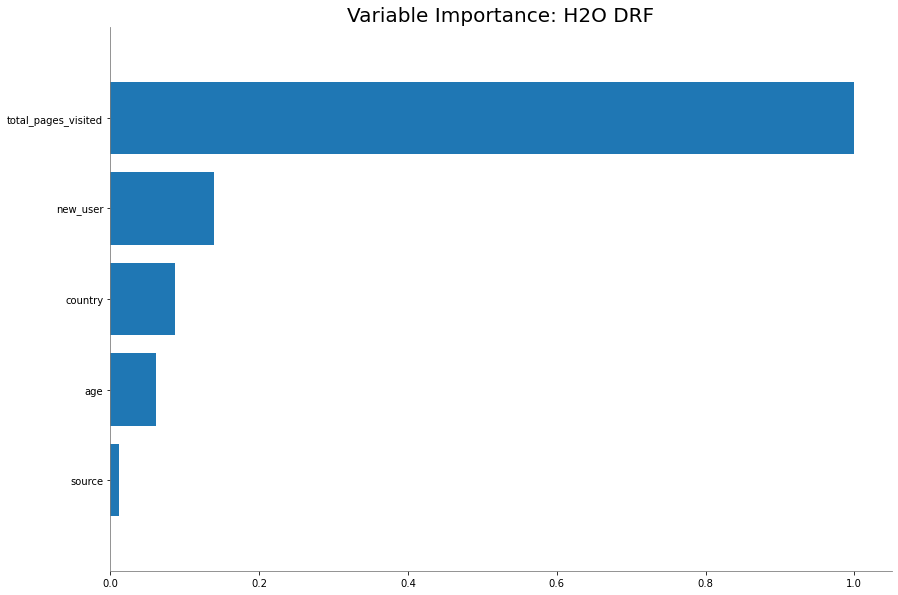

In [46]:
model.varimp_plot()

In [52]:
train_target = train.as_data_frame()["converted"].values
test_target = test.as_data_frame()["converted"].values

train_pred = model.predict(train).as_data_frame()["p1"].values
test_pred = model.predict(test).as_data_frame()["p1"].values

drf prediction progress: |████████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%


In [54]:
train_fpr, train_tpr, _ = roc_curve(train_target, train_pred)
test_fpr, test_tpr, _ = roc_curve(test_target, test_pred)

train_auc = np.round(auc(train_fpr, train_tpr), 3)
test_auc = np.round(auc(test_fpr, test_tpr), 3)

In [65]:
print(classification_report(y_true = test_target, y_pred = (test_pred > 0.5).astype(int)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     76500
           1       0.84      0.63      0.72      2550

    accuracy                           0.98     79050
   macro avg       0.91      0.81      0.86     79050
weighted avg       0.98      0.98      0.98     79050



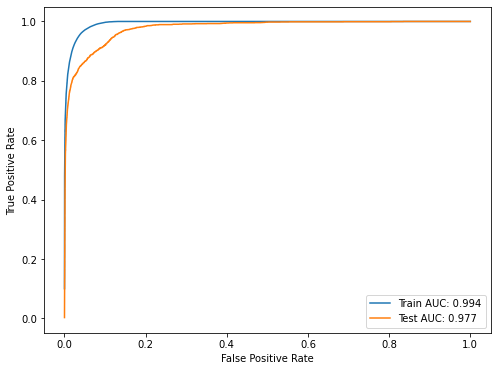

In [73]:
fig, ax = plt.subplots(figsize = (8, 6))

sns.lineplot(train_fpr, train_tpr, label = "Train AUC: {}".format(train_auc))
sns.lineplot(test_fpr, test_tpr, label = "Test AUC: {}".format(test_auc))
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")

plt.show()

PartialDependencePlot progress: |█████████████████████████████████████████| 100%

PartialDependence: Partial Dependence Plot of model DRF_model_python_1602791985519_1 on column 'country'.


,country,mean_response,stddev_response,std_error_mean_response
0,China,0.002093,0.016863,0.000035
1,Germany,0.030903,0.145262,0.000298
2,UK,0.034141,0.145860,0.000300
3,US,0.029349,0.123030,0.000253



PartialDependence: Partial Dependence Plot of model DRF_model_python_1602791985519_1 on column 'age'.


,age,mean_response,stddev_response,std_error_mean_response
0,17.000000,0.035772,0.139605,0.000287
1,20.263158,0.034981,0.140801,0.000289
2,23.526316,0.030770,0.133352,0.000274
3,26.789474,0.028441,0.127473,0.000262
4,30.052632,0.026049,0.120194,0.000247
5,33.315789,0.023672,0.114200,0.000235
6,36.578947,0.020908,0.111043,0.000228
7,39.842105,0.018504,0.107216,0.000220
8,43.105263,0.014365,0.083514,0.000171
9,46.368421,0.013869,0.090971,0.000187



PartialDependence: Partial Dependence Plot of model DRF_model_python_1602791985519_1 on column 'new_user'.


,new_user,mean_response,stddev_response,std_error_mean_response
0,0,0.039655,0.148814,0.000306
1,1,0.017620,0.092791,0.000191



PartialDependence: Partial Dependence Plot of model DRF_model_python_1602791985519_1 on column 'source'.


,source,mean_response,stddev_response,std_error_mean_response
0,Ads,0.027751,0.127616,0.000262
1,Direct,0.025500,0.123814,0.000254
2,Seo,0.028414,0.128307,0.000263



PartialDependence: Partial Dependence Plot of model DRF_model_python_1602791985519_1 on column 'total_pages_visited'.


,total_pages_visited,mean_response,stddev_response,std_error_mean_response
0,1.000000,0.000261,0.000223,4.569685e-07
1,2.473684,0.000473,0.001929,3.960723e-06
2,3.947368,0.001053,0.004309,8.847630e-06
3,5.421053,0.001523,0.005471,1.123444e-05
4,6.894737,0.005968,0.014703,3.019195e-05
5,8.368421,0.012961,0.030787,6.322106e-05
6,9.842105,0.053986,0.087421,1.795177e-04
7,11.315789,0.094213,0.138471,2.843477e-04
8,12.789474,0.231135,0.262840,5.397371e-04
9,14.263158,0.323743,0.306645,6.296885e-04


[, , , , ]

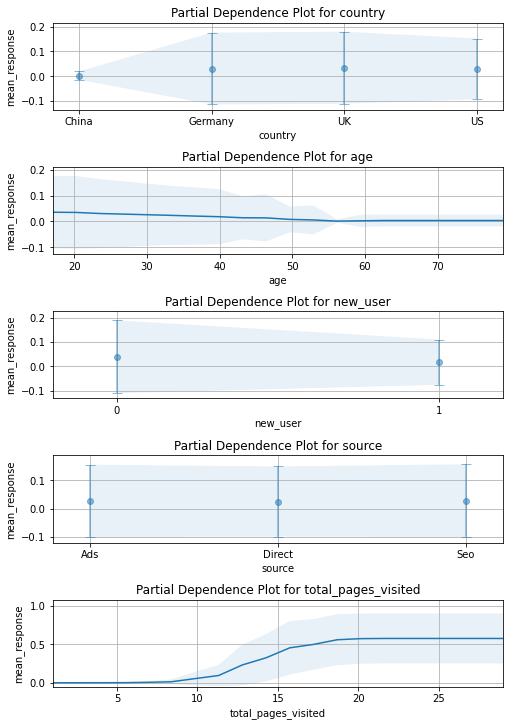

In [77]:
model.partial_plot(train, cols = feature)

In [78]:
h2o.cluster().shutdown()

H2O session _sid_888c closed.
